In [ ]:
!pip install -Uqq nixtla dask-expr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.5/244.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nixtla import NixtlaClient
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

In [ ]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-nlPrQBgeS2R3k0n0oRrvcAQlkE7trLo9Nyspwz3mMFeZqSu6fdfHa0xMkjzsaD5z0WSEMEIOwBIQXX8j'
)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=df, h=12, finetune_steps=10,
    time_col='timestamp', target_col='value',
)

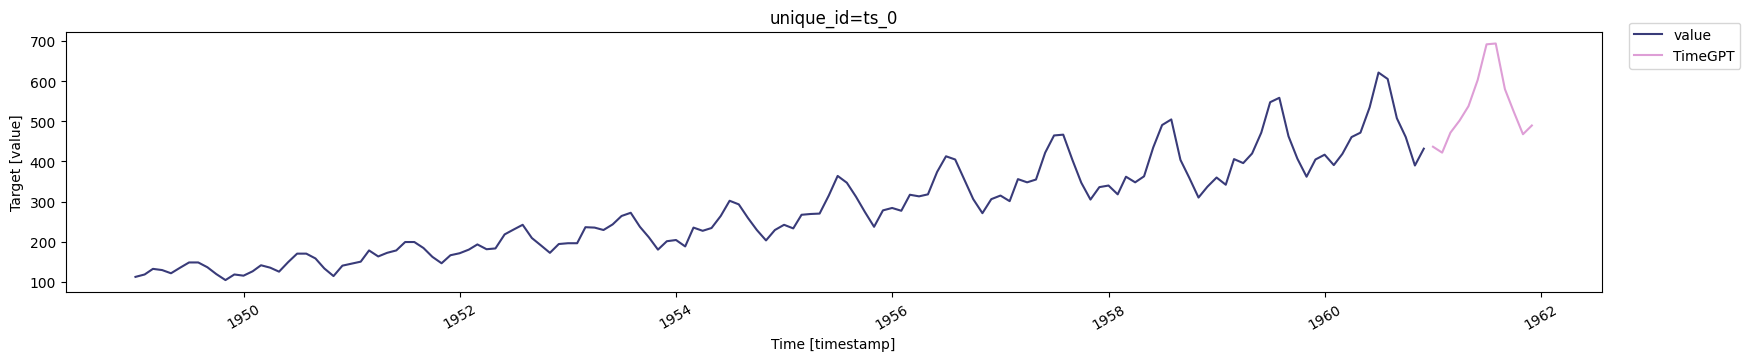

In [ ]:
nixtla_client.plot(
    df, timegpt_fcst_finetune_df,
    time_col='timestamp', target_col='value',
)

In [ ]:
train = df[:-24]
test = df[-24:]

In [ ]:
depths = [1, 2, 3, 4, 5]

test = test.copy()

for depth in depths:
    preds_df = nixtla_client.forecast(
    df=train,
    h=24,
    finetune_steps=5,
    finetune_depth=depth,
    time_col='timestamp',
    target_col='value')

    preds = preds_df['TimeGPT'].values

    test.loc[:,f'TimeGPT_depth{depth}'] = preds

In [ ]:
test['unique_id'] = 0

evaluation = evaluate(test, metrics=[mae, mse], time_col="timestamp", target_col="value")
evaluation

,unique_id,metric,TimeGPT_depth1,TimeGPT_depth2,TimeGPT_depth3,TimeGPT_depth4,TimeGPT_depth5
0,0,mae,22.675540,17.908963,21.243560,24.745096,29.183245
1,0,mse,677.254283,461.320852,671.131971,991.835359,1147.905234
